In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
import pandas as pd
import pickle
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [2]:
Dados = pd.read_csv(r'C:\Users\Mateus\Meu Drive\Compartilhado\eng\9_periodo\Controle inteligente\Trabalho 3\sem_pertu\teste5.csv', on_bad_lines='skip', header=None)
# Dados.values
# Dados.head(5)
# print(Dados)

Entradas = Dados.iloc[:,:-1]
Entradas.shape
Saidas = Dados.iloc[:,4]

In [3]:
Entradas

,0,1,2,3
0,-0.164985,-4.285309,-0.005717,6.335611
1,-0.207838,-0.045053,0.057639,-0.025509
2,-0.208288,0.552431,0.057384,-0.911779
3,-0.202764,0.075944,0.048266,-0.189794
4,-0.202005,-0.043102,0.046368,-0.004341
...,...,...,...,...
49628,-0.000470,0.000573,-0.000078,0.000092
49629,-0.000464,0.000566,-0.000077,0.000091
49630,-0.000458,0.000560,-0.000076,0.000090
49631,-0.000453,0.000553,-0.000075,0.000089


In [4]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(Entradas,Saidas,test_size=0.2)

In [49]:
Rede=MLPRegressor(hidden_layer_sizes=[4,2],
                  activation='relu',
                  verbose=True,
                  max_iter=10000,
                  solver="adam")
Rede.fit(Entradas,Saidas)

Iteration 1, loss = 416.65237567
Iteration 2, loss = 415.31209160
Iteration 3, loss = 413.74935484
Iteration 4, loss = 411.93911751
Iteration 5, loss = 409.77794165
Iteration 6, loss = 407.31975430
Iteration 7, loss = 404.29177772
Iteration 8, loss = 400.75518971
Iteration 9, loss = 396.82251015
Iteration 10, loss = 392.47513472
Iteration 11, loss = 388.04416711
Iteration 12, loss = 383.35777095
Iteration 13, loss = 378.15333666
Iteration 14, loss = 373.04988388
Iteration 15, loss = 367.75912849
Iteration 16, loss = 362.38826027
Iteration 17, loss = 357.07296849
Iteration 18, loss = 351.34065530
Iteration 19, loss = 345.57054595
Iteration 20, loss = 339.76786374
Iteration 21, loss = 333.95926865
Iteration 22, loss = 328.13984905
Iteration 23, loss = 322.82970010
Iteration 24, loss = 317.57187203
Iteration 25, loss = 312.66087031
Iteration 26, loss = 307.65913295
Iteration 27, loss = 302.80058206
Iteration 28, loss = 298.24765012
Iteration 29, loss = 293.75073895
Iteration 30, loss = 28

MLPRegressor(hidden_layer_sizes=[4, 2], max_iter=10000, verbose=True)

In [50]:
r2train=Rede.score(Xtrain, Ytrain)
print("R2 Score do treinamento: ", r2train)
r2test=Rede.score(Xtest, Ytest)
print("R2 Score do teste: ", r2test)

R2 Score do treinamento:  0.48629558121138106
R2 Score do teste:  0.6453513272383031


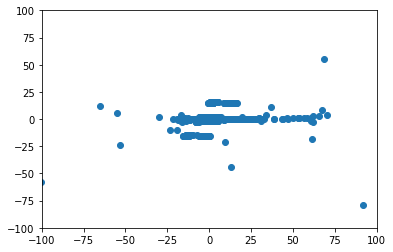

In [51]:
Ypred=Rede.predict(Xtest)
plt.scatter(Ypred,Ytest)
plt.xlim([-100,100])
plt.ylim([-100,100])
#plt.scatter(Xtest,Ypred)
plt.show()

In [48]:
filename = 'finalized_model_sem_espaco.sav'
pickle.dump(Rede, open(filename, 'wb'))
 
# some time later...
 


In [50]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, Ytest)
print(result)

0.6465708993511641
